# Noise2Void - 2D Example for RGB Data

In [1]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

Using TensorFlow backend.


## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.  
model_name = 'BSD68_reproducability_5x5'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)









Loading network weights from 'weights_best.h5'.


In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

In [4]:
sigma = 25/255.

## Prediction
Here we will simply use the same image as during training and denoise it using our network.

In [5]:
from skimage import img_as_float32 as img_as_float
import cv2
from skimage.util import random_noise
from skimage.color import rgb2gray

In [9]:
# We read the image we want to process and get rid of the Alpha channel.
# img = imread('data/longBeach.png')[...,:3]

img = img_as_float(cv2.imread('/data/image/denoise/test/gt/Set5/woman_GT.bmp', 1)[:, :, ::-1])
img = np.expand_dims(rgb2gray(img), axis=-1)
img = random_noise(img, mode='gaussian', var=sigma**2, seed=0)
# Here we process the image.
pred = model.predict(img, axes='YXC').squeeze(-1)

The input image is of type float64 and will be casted to float32 for prediction.


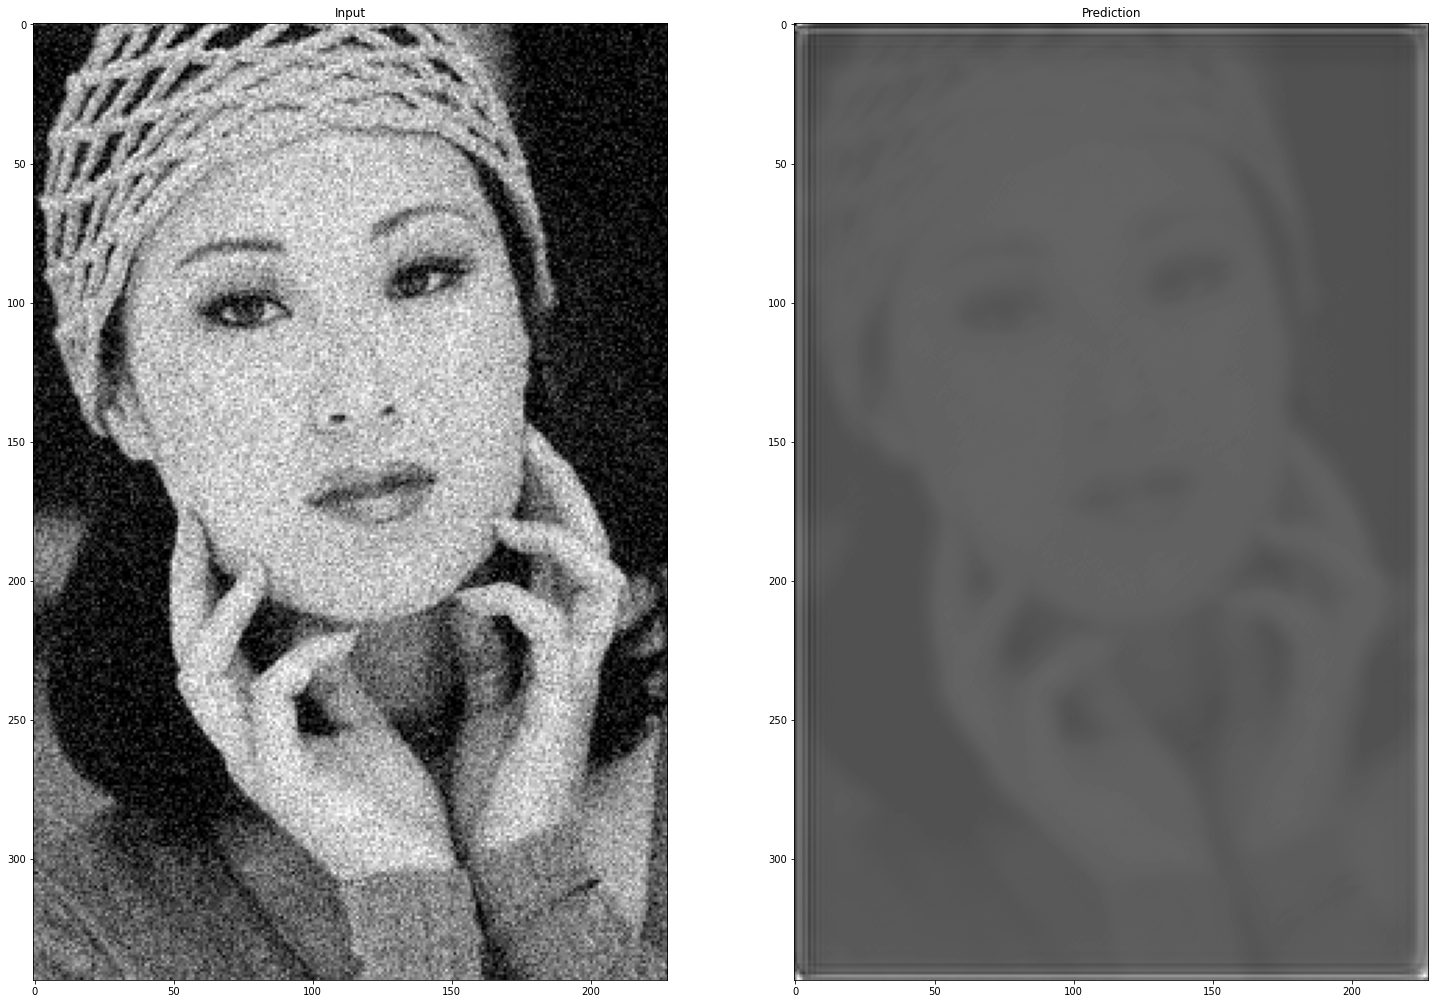

In [11]:
# Let's look at the results.
plt.figure(figsize=(25,25))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow( img[:, :, 0], cmap='gray')
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow( pred[:, :], cmap='gray')
plt.title('Prediction');


## Save Results

In [8]:
from matplotlib.image import imsave
imsave('pred_longBeach.png', np.clip(pred,0.0,1.0))

ValueError: third dimension must be 3 or 4